# Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

# Load data

In [28]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(f"Train dataset: {train_images.shape}")
print(f"Test dataset: {test_images.shape}")


Train dataset: (60000, 28, 28)
Test dataset: (10000, 28, 28)


In [29]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
				'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [30]:
# Pixel values are in the range of 0-255 (black-white), in grayscale
print(f"Values range from {train_images.min()} - {train_images.max()}")


Values range from 0 - 255


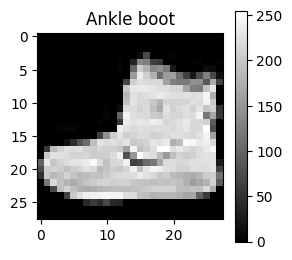

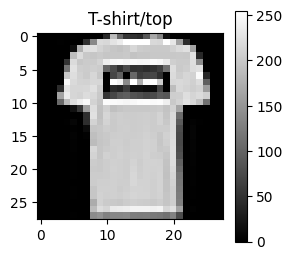

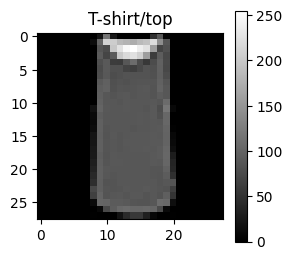

In [31]:

for i in range(0,3):
	plt.figure(figsize=(3,3))
	plt.imshow(train_images[i], cmap='gray')
	plt.colorbar()
	plt.grid(False)
	plt.title(class_names[train_labels[i]])
	plt.show()

# Data preprocessing

In [32]:
# transform greyscale pixel values (0-255) to the range of 0-1

if train_images.max() == 255:
    print('scaling train_images...')
    train_images = train_images / 255
if test_images.max() == 255:
    print('scaling test_images...')
    test_images = test_images / 255

print(train_images.min(), train_images.max())

scaling train_images...
scaling test_images...
0.0 1.0


# Model


In [33]:
### classification MLP with two hidden layers
model = keras.Sequential([ # "Sequential" model - sequential input
    keras.layers.Flatten(input_shape=(28,28)), # input layer - converts each input image into a 1D array of shape (728,)
    keras.layers.Dense(300, activation='relu'), # hidden layer 1
    keras.layers.Dense(128, activation='relu'), # hidden layer 2
    # keras.layers.Dense()
    keras.layers.Dense(10, activation='softmax') # output layer
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 128)               38528     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 275,318
Trainable params: 275,318
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(
    optimizer='sgd', # sgd, adam
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [35]:
history = model.fit(
    train_images, train_labels, 
    validation_split=0.1,
    epochs=30
)


Epoch 1/30
1688/1688 [==============================] - 5s 2ms/step - loss: 0.7176 - accuracy: 0.7667 - val_loss: 0.5741 - val_accuracy: 0.7902
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4920 - accuracy: 0.8292 - val_loss: 0.5166 - val_accuracy: 0.8150
Epoch 3/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4446 - accuracy: 0.8444 - val_loss: 0.4299 - val_accuracy: 0.8483
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4168 - accuracy: 0.8546 - val_loss: 0.4283 - val_accuracy: 0.8487
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3958 - accuracy: 0.8621 - val_loss: 0.4085 - val_accuracy: 0.8525
Epoch 6/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3808 - accuracy: 0.8668 - val_loss: 0.4104 - val_accuracy: 0.8552
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3668 - accuracy: 0.8705 - val_loss: 0.3851 - val_accuracy:

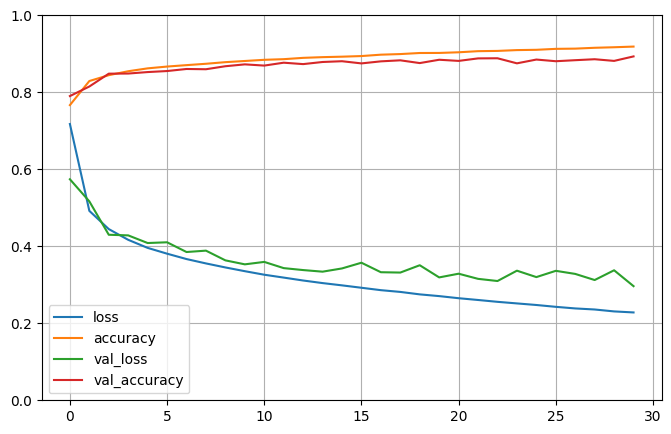

In [36]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [37]:
### Get test results
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print(f"Test accuracy: {test_acc:.3f}")
# can change the number of epochs to see how the test accuracy score changes
# e.g. check epochs = [1, 5, 10]

313/313 [==============================] - 1s 2ms/step - loss: 0.3274 - accuracy: 0.8840
Test accuracy: 0.884


In [38]:
### Let's make some predictions on the test set and see what they look like
predictions = model.predict(test_images)

# predict just one
# predictions = model.predict([test_images[0]])

print(predictions) # probabilities for each of the outcomes

313/313 [==============================] - 0s 1ms/step
[[1.2113018e-06 9.9988732e-08 2.2179463e-06 ... 1.2255359e-02
  1.3220138e-04 9.8239708e-01]
 [5.3454201e-05 3.4389876e-07 9.9426091e-01 ... 2.2463958e-11
  3.4298740e-08 2.5084506e-11]
 [3.5780874e-06 9.9999595e-01 3.1197356e-08 ... 4.2006701e-10
  3.7983074e-09 2.2034529e-11]
 ...
 [3.5343806e-03 6.2083629e-08 4.9715146e-04 ... 5.5528545e-07
  9.9518245e-01 3.2545241e-08]
 [4.6161781e-06 9.9993563e-01 1.7336406e-06 ... 1.2967806e-07
  1.2925048e-07 5.8218910e-07]
 [1.1402272e-05 2.1293483e-06 7.1376766e-05 ... 1.6122638e-03
  2.8848162e-04 3.5397268e-05]]


Actual label:    Bag
Predicted label: Bag
Predictions: [2.3770144e-05 8.5501002e-09 7.8238336e-06 1.4085593e-06 6.5377249e-06
 3.0810277e-06 1.5708258e-07 2.8025985e-08 9.9995720e-01 7.9611602e-11]


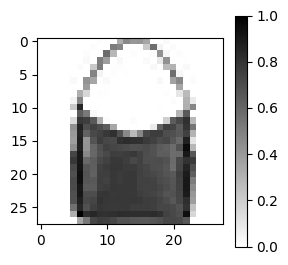

In [39]:
# e.g. let's check prediction for one of the images
index = 34

print(f"Actual label:    {class_names[ test_labels[index] ]}")
index_label = np.argmax(predictions[index])
print(f"Predicted label: {class_names[index_label]}")
print(f"Predictions: {predictions[index]}")

plt.figure(figsize=(3,3))
plt.imshow(test_images[index], cmap=plt.cm.binary) # 'cmap' parameter makes the figure grayscale
plt.colorbar()
plt.grid(False)
plt.show()
